## Hyper-params for batch gradient descent 

- batch size

In [33]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd
from keras.optimizers import SGD

## Effect of batch size

In [34]:
def evaluate_model(n_input, n_classes, trainX, trainy, testX, testy, batch_size):

    # define model
    model = tf.keras.Sequential()
    model.add(layers.Dense(10, activation='relu', name='layer-0', input_shape=(n_input,)))
    model.add(layers.Dense(n_classes, activation='softmax', name='layer-1'))
    
    # compile model
    model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), batch_size=batch_size, epochs=100, verbose=0)     
    return history

In [35]:
trainX, trainy, testX, testy = ut.create_dataset(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
n_input, n_classes = trainX.shape[1], testy.shape[1]

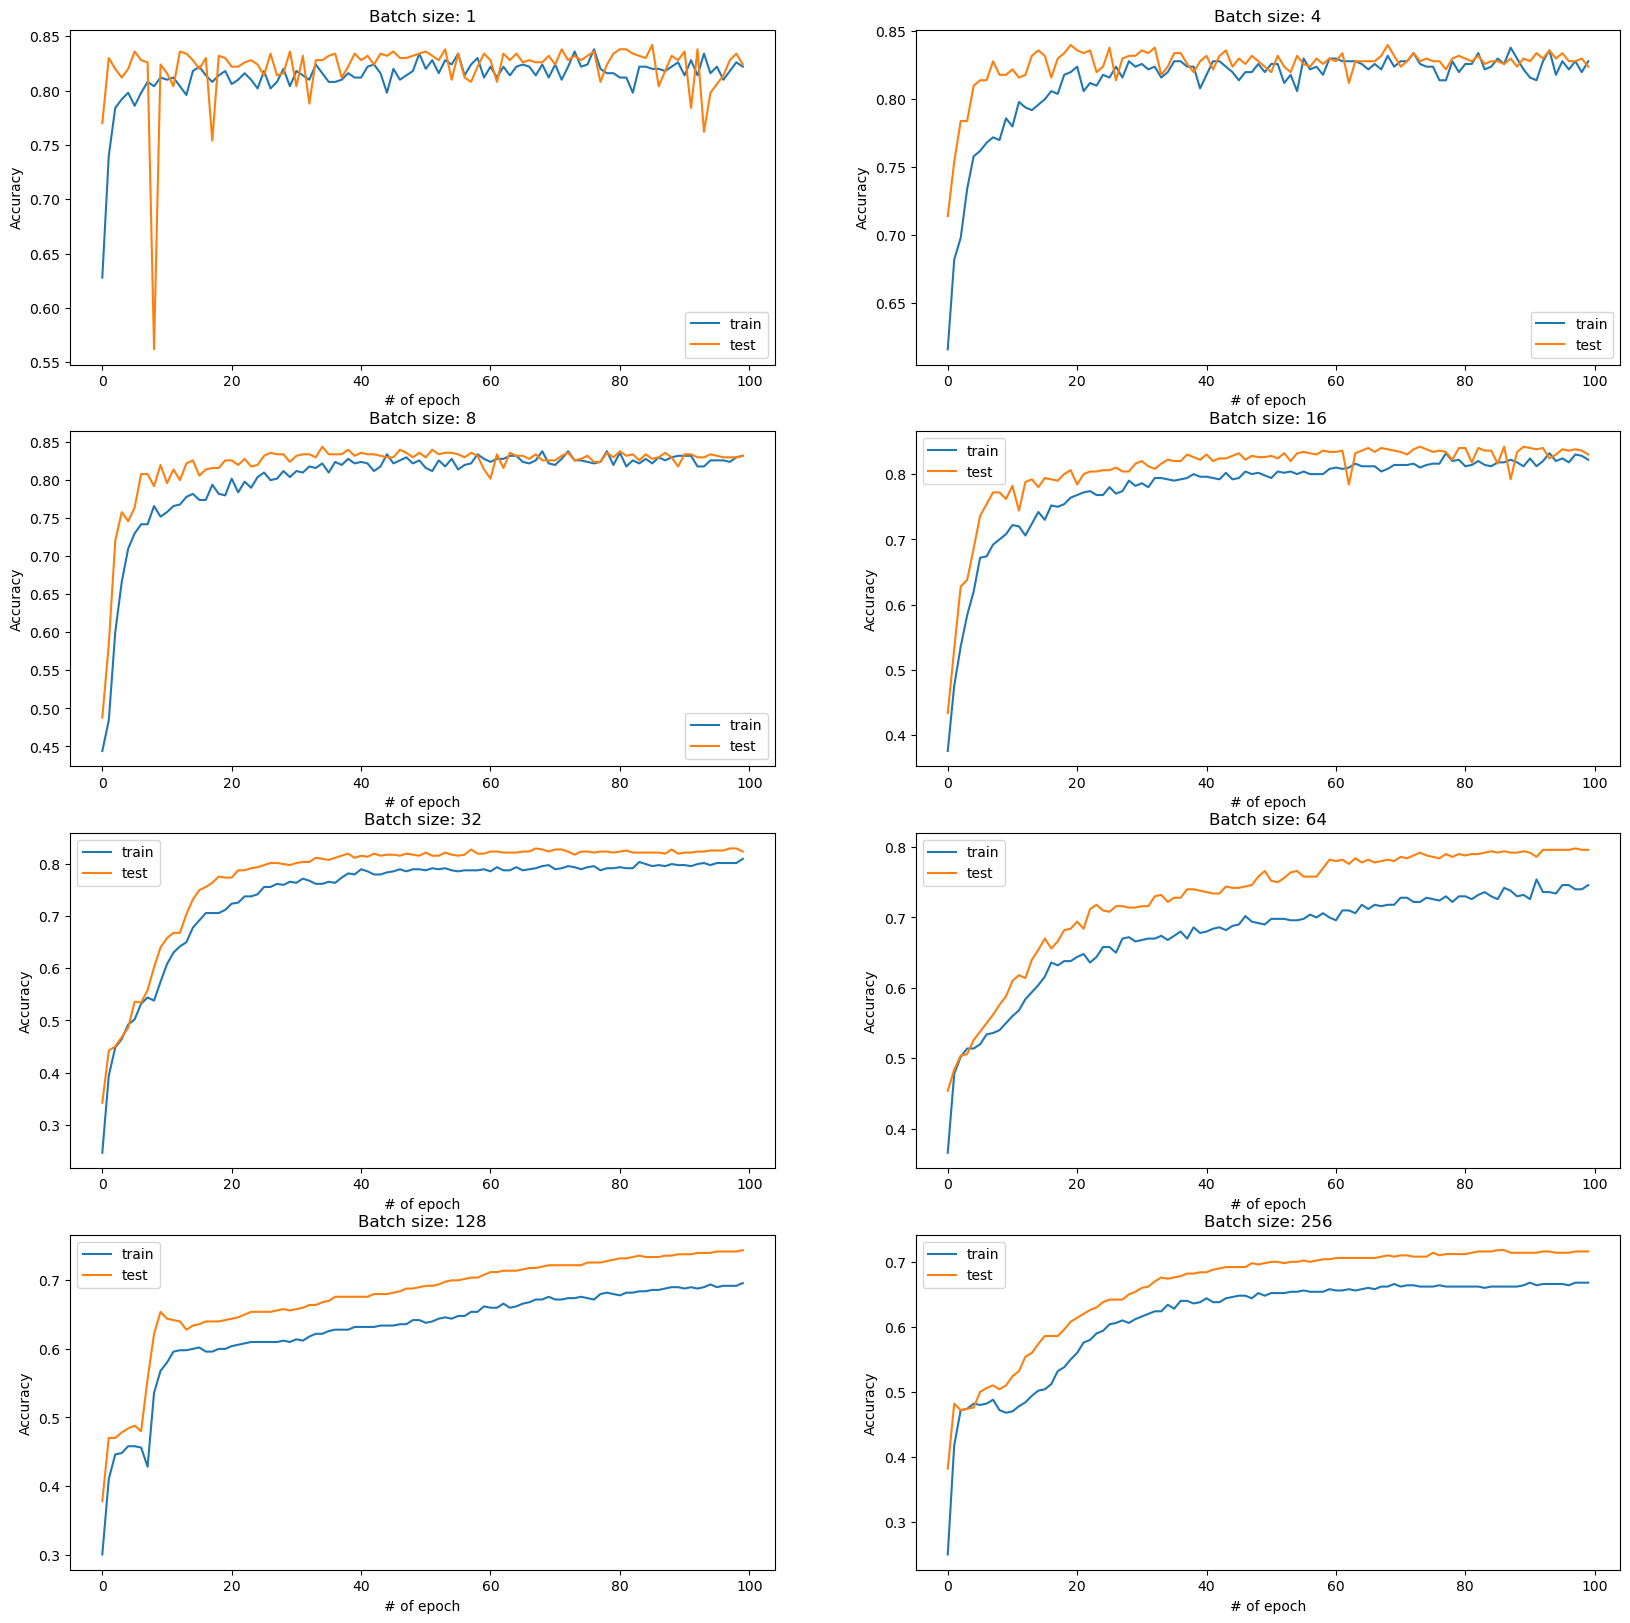

In [36]:
# plot learning curves
batch_size_arr = [1, 4, 8, 16, 32, 64, 128, 256]
plt.figure(figsize=(20,20))
i = 0
for batch_size in batch_size_arr:
  history = evaluate_model(n_input, n_classes, trainX, trainy, testX, testy, batch_size)
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  plt.plot(history.history['accuracy'], label='train')
  plt.xlabel('# of epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Batch size: {batch_size}')
  plt.legend()

  plt.plot(history.history['val_accuracy'], label='test')
  plt.xlabel('# of epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Batch size: {batch_size}')
  plt.legend()
  i = i+1


plt.show()

## Observations

1) With low batch size: training is fast but noisy/ higher variance in classification accuracy
2) Larger batch size: slow down learning but final stages result in convergence to a more stable model shown by lower variance in classification accuracy